# AR HW 1: Predicting Rainfall in Australia Using Neural Networks

## Table of Contents
1. [The Problem Statement](#1)
2. [Importing Libraries](#2)
3. [Loading the Dataset](#3)
4. [Exporatory Data Analysis](#4)
    - [Initial Overview](#4.1) 
5. [Target Variable Exploration (Univariate Analysis)](#5)
   - [Target Variable Summary](#5.1) 
6. [Feature Exploration, Cleaning, and Preprocessing (Bivariate Analysis)](#6)
    - [Categorical Features](#6.1) 
        - [Feature Engineering of Date Variable](#6.1.1) 
        - [Handling Missing Values](#6.1.2) 
        - [Encoding Variables](#6.1.3) 
    - [Numerical Features](#6.2) 
        - [Numerical Feature Summary](#6.2.1)
        - [Handling Missing Values](#6.2.2)
        - [Scaling Features](#6.2.3) 
        - [Handling Outliers](#6.2.4) 
    - [Splitting the Dataset](#6.3)
7. [Feature Analysis (Multivariate Analysis)](#7)
    - [Heatmap](#7.1)
        - [Heatmap Summary](#7.1.1) 
    - [Feature Engineering and Selection](#7.2)
        - [Feature Engineering and Selection Interpretation](#7.2.1) 
8. [Model Building](#8)
9. [Model Training and Validation](#9)
    - [Initial Model](#9.1)
    - [Hyperparameter Tuning](#9.2)
10. [Hypermodel Evaluation](#10)
11. [Report and Interpretation](#11)

## 1. The problem statement <a class="anchor" id="1"></a>

In this notebook we will try to determine whether or not it will rain in Australia tomorrow. We will implement an artificial neural network to accomplish this.


## 2. Importing Libraries <a class="anchor" id="2"></a>

Before building the model, we must import the necessary libraries.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for preprocessing, scaling, etc.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# import model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
# mute warnings
import warnings

warnings.filterwarnings('ignore')

## 3. Loading the Dataset <a class="anchor" id="4"></a>

Now loading the Rain in Australia dataset using Pandas (dataframe).

In [3]:
data = '/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'

df = pd.read_csv(data)

## 4. Exploratory Data Analysis <a class="anchor" id="4"></a>

Let us take a look at the imported data. First we can view the dimensions of the data and preview the first 5 observations of the data.

In [4]:
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Looks like we have $145,460$ (rows) and $23$ features (columns). Let us take a look at the list of features. 

In [5]:
column_names = df.columns
column_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Viewing a summary of the data:

In [6]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

Viewing statistical properties of the dataset:

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Initial Overview <a class="anchor" id="4.1"></a>

- The dataset's features have a mix of categorical and numerical variables.

- Categorical variables have data type `object`.

- Numerical variables have data type `float64`.

- The data has some NaN values scattered throughout. Also, for some numerical features the maximum values that are far from the average, hinting toward the presence of outliers. Thus, we will have to do some data cleaning later. 

- The target variable is `RainTomorrow`, for whether it will rain tomorrow in Australia or not. Thus it should be binary, taking the values `Yes` or `No`. 

## 5. Target Variable Exploration (Univariate Analysis) <a class="anchor" id="5"></a>
Let's take a closer look at the target variable. Checking for missing values:

In [8]:
df['RainTomorrow'].isnull().sum()

3267

Looks like out of the total $145460$ observations, $3267$ have a missing target variable. Since the percentage of these observations is low, let us delete them:

In [9]:
df = df.dropna(subset=['RainTomorrow'])
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Now ensuring that the target is a binary outcome:

In [10]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

What is the frequency distribution?

In [11]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

How about the percentage of this distribution?

In [12]:
df['RainTomorrow'].value_counts()/len(df)

RainTomorrow
No     0.775819
Yes    0.224181
Name: count, dtype: float64

Let's plot the distribution to visualize it:

<Axes: xlabel='RainTomorrow', ylabel='count'>

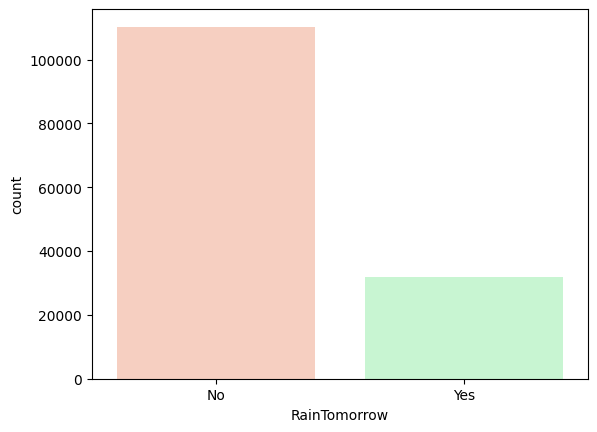

In [13]:
cols= ["#ffcbb8","#c0fcce"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

Also doing text preprocessing for the target variable:

In [14]:
df["RainTomorrow"].replace({"No":0,"Yes":1},inplace=True)

### Target Variable Summary <a class="anchor" id="5.1"></a>
- `RainTomorrow` is a binary variable with the two unique values `No` and `Yes`. 
- `No` appears $110316$ times, which is $77.58\%$ of the time.
- `Yes` appears $31877$ times, which is $22.42\%$ of the time.
- The plot confirms the above information.

## 6. Feature Exploration, Cleaning, and Preprocessing (Bivariate Analysis)<a class="anchor" id="6">
Through EDA we found our features can be either categorical variables or numerical ones. Let us examine the categorical variables first.
    
### Categorical Features <a class="anchor" id="6.1">
Finding the categorical variables:

In [15]:
# Categorical variables have data type object
categorical = [var for var in df.columns if df[var].dtype=='O']

print('The {} categorical variables are:\n'.format(len(categorical)), categorical)

The 6 categorical variables are:
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Strangely Date is a categorical variable. Let's preview the data to investigate:

In [16]:
# Preview categorical variables
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


Also looking at the cardinality of cateogorical variables:

In [17]:
for col in categorical:
    print(f"{col}: {df[col].nunique()}")

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2


Looks like the Dates (of type object and has high cardinality) should be parsed into datetime. So we really have 6 categorical variables, and 5 categorical features excluding the target variable. 



#### Feature Engineering of Date Variable <a class="anchor" id="6.1.1">

In [18]:
# Checking for null Dates
df['Date'].isnull().sum()

0

In [19]:
# parse the dates, currently coded as strings, into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# extract year from date
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [20]:
# extract month from date
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [21]:
# extract day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [22]:
# drop the original Date variable
df.drop('Date', axis=1, inplace = True)

In [23]:
# view updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

#### Handling Missing Values <a class="anchor" id="6.1.2">

Let us handle any missing values for our categorical variables by replacing them with the most common value or mode. Viewing how many missing values we're dealing with:

In [24]:
# Get a new list of categorical variables (
s = (df.dtypes == "object")
categorical = list(s[s].index)
categorical_features = [feature for feature in categorical if feature != 'RainTomorrow']
# Display missing values for categorical features
print("Missing Value Count for categorical variables - ")
for feature in categorical_features:
    print(feature,":", df[feature].isnull().sum())

Missing Value Count for categorical variables - 
Location : 0
WindGustDir : 9330
WindDir9am : 10013
WindDir3pm : 3778
RainToday : 1406


In [25]:
# Filling missing values with mode of each column
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

Note that we did not modify `Location` or the target `RainTomorrow` because there are no missing values for those variables.

In [26]:
# Display missing values for categorical variables
print("Missing Value Count for categorical variables - ")
for feature in categorical_features:
    print(feature,":", df[feature].isnull().sum())

Missing Value Count for categorical variables - 
Location : 0
WindGustDir : 0
WindDir9am : 0
WindDir3pm : 0
RainToday : 0


#### Encoding Variables <a class="anchor" id="6.1.3">
Now we must do a label encoding of the categorical variables, so that the neural network can work with them:

In [27]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

Looks like the categorical features have been encoded properly.

### Numerical Features <a class="anchor" id="6.2">
Now let's explore the numerical features:

In [28]:
# non-categorical variables are numerical variables
numerical = [var for var in df.columns if var not in categorical]

# Exclude specific columns from the list
columns_to_exclude = ['Year', 'Month', 'Day', 'RainTomorrow']
numerical = [col for col in numerical if col not in columns_to_exclude]

print('The {} numerical variables are:\n'.format(len(numerical)), numerical)
df[numerical].head()

The 16 numerical variables are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


#### Numerical Feature Summary  <a class="anchor" id="6.2.1"></a>


- There are 16 numerical features. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.
- There are some outliers (refer to Initial Overview) and missing values we must handle.

#### Handling Missing Values <a class="anchor" id="6.2.2"></a>

In [29]:
# check missing values in numerical variables
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

Looks like all of the numerical features have missing values. Two ways to handle these are to median inputation or random sample imputation. Since there are outliers in our data, we can use median imputation to replace the missing values with the feature medians which are robust to outliers:

In [30]:
# for each feature, replace missing values with median
for feature in numerical:
    df[feature].fillna(df[feature].median(), inplace=True)
    
# verify that there are no missing values
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### Scaling Features <a class="anchor" id="6.2.3"></a>

In [31]:
target = df['RainTomorrow']

# Select only the columns to be scaled (excluding 'RainTomorrow')
cols_to_scale = df.columns[df.columns != 'RainTomorrow']

# Set up a standard scaler for the selected columns
std_scaler = preprocessing.StandardScaler()

# Scale the selected columns and create a DataFrame with the scaled values
scaled_features = std_scaler.fit_transform(df[cols_to_scale])
df[cols_to_scale] = scaled_features

# Verify the changes
print(df.describe().T)

                  count          mean       std       min       25%       50%  \
Location       142193.0  2.398575e-17  1.000004 -1.667479 -0.894869  0.018216   
MinTemp        142193.0  3.166118e-16  1.000004 -3.237728 -0.717738 -0.029045   
MaxTemp        142193.0  3.421966e-16  1.000004 -3.941909 -0.749039 -0.087961   
Rainfall       142193.0  8.594892e-17  1.000004 -0.276125 -0.276125 -0.276125   
Evaporation    142193.0 -1.071363e-16  1.000004 -1.627183 -0.371450 -0.120303   
Sunshine       142193.0  7.259686e-16  1.000004 -2.903725  0.056962  0.165280   
WindGustDir    142193.0 -1.471126e-16  1.000004 -1.716789 -0.864683  0.200450   
WindGustSpeed  142193.0  1.778943e-16  1.000004 -2.581325 -0.678822 -0.070021   
WindDir9am     142193.0 -5.756579e-17  1.000004 -1.550574 -0.886072 -0.000070   
WindDir3pm     142193.0  3.837719e-17  1.000004 -1.713146 -0.833311  0.046525   
WindSpeed9am   142193.0 -7.915296e-17  1.000004 -1.580789 -0.789970 -0.112126   
WindSpeed3pm   142193.0  1.0

#### Handling Outliers <a class="anchor" id="6.2.4"></a>
Using a boxplot to visualize outliers:

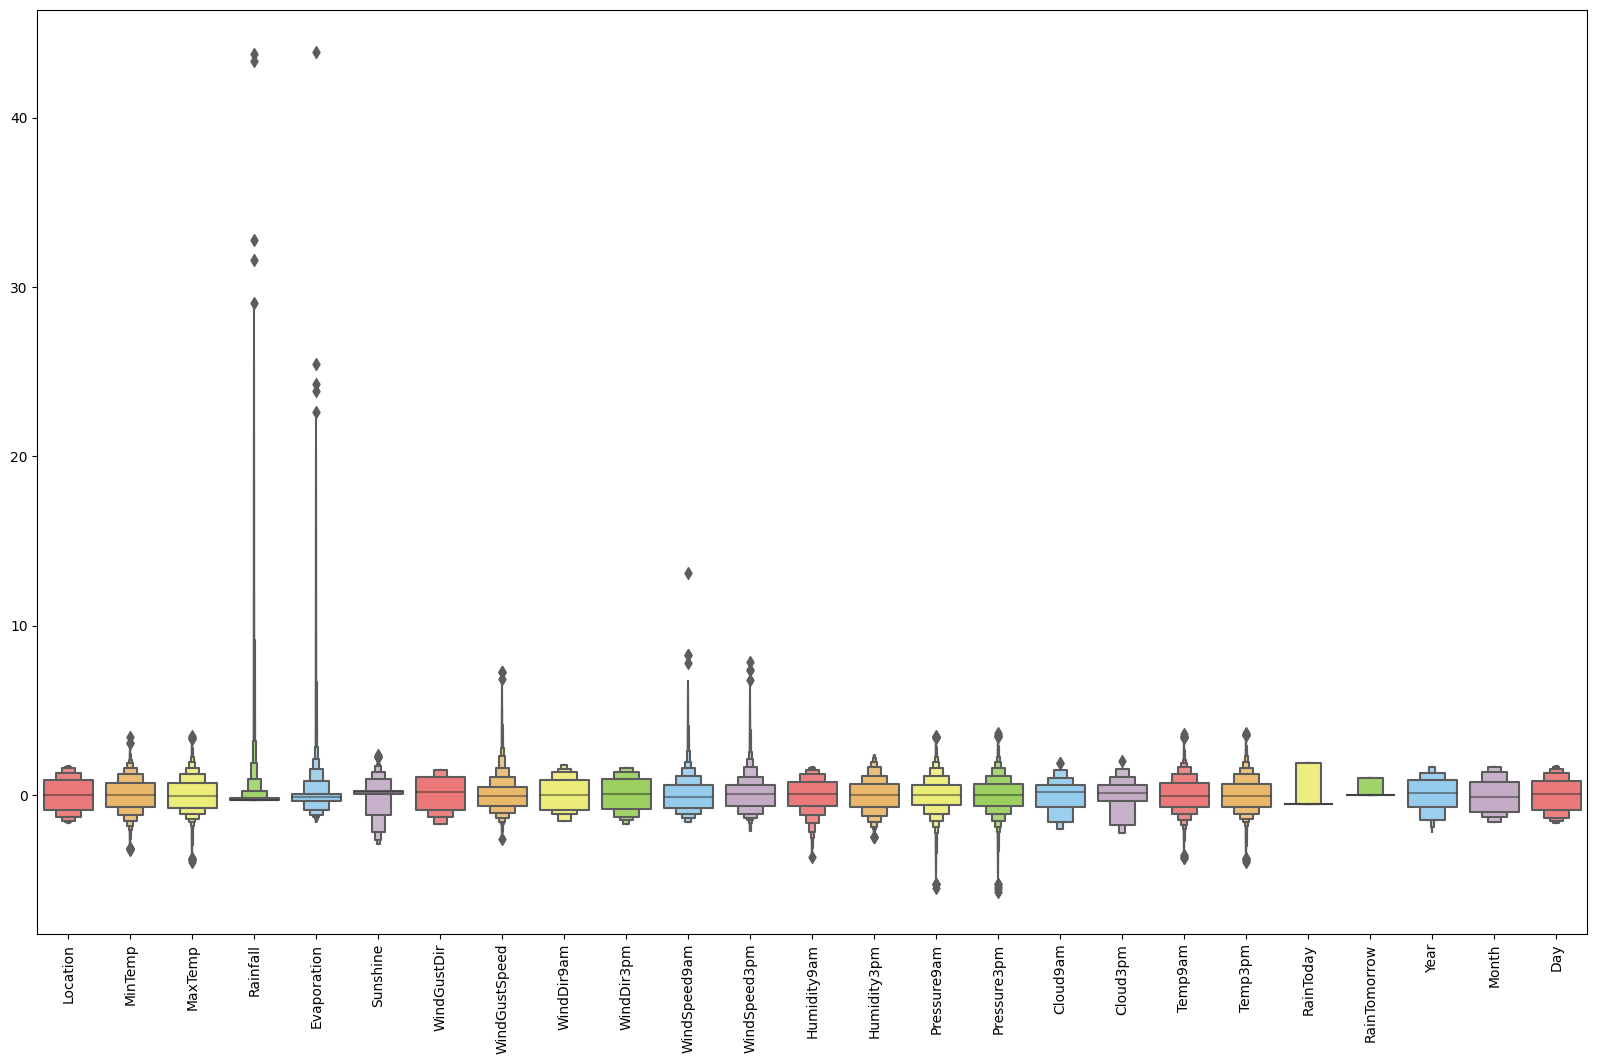

In [32]:
#looking at the scaled features
colors = ["#ff6666", "#ffbd55", "#ffff66", "#9de24f", "#87cefa", '#C8A8CB']
plt.figure(figsize=(20,12))
sns.boxenplot(data = df,palette = colors)
plt.xticks(rotation=90)
plt.show()

Let's drop outliers based on the IQR (Inter Quartile Range):

In [33]:
for col in ['Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1
    
    lower=round(q1-1.5*iqr,2)
    upper=round(q3+1.5*iqr,2)
    df=df[(df[col]<upper)&(df[col]>lower)]
    
# or doing it manually
df = df[(df["MinTemp"]<2.3)&(df["MinTemp"]>-2.3)]
df = df[(df["MaxTemp"]<2.3)&(df["MaxTemp"]>-2)]
df = df[(df["Rainfall"]<4.5)]
df = df[(df["Sunshine"]<2.1)]
df = df[(df["WindGustSpeed"]<4)&(df["WindGustSpeed"]>-4)]
df = df[(df["Humidity9am"]>-3)]
df = df[(df["Humidity3pm"]>-2.2)]
df = df[(df["Pressure9am"]< 2)&(df["Pressure9am"]>-2.7)]
df = df[(df["Pressure3pm"]< 2)&(df["Pressure3pm"]>-2.7)]
df = df[(df["Cloud9am"]<1.8)]
df = df[(df["Cloud3pm"]<2)]
df = df[(df["Temp9am"]<2.3)&(df["Temp9am"]>-2)]
df = df[(df["Temp3pm"]<2.3)&(df["Temp3pm"]>-2)]

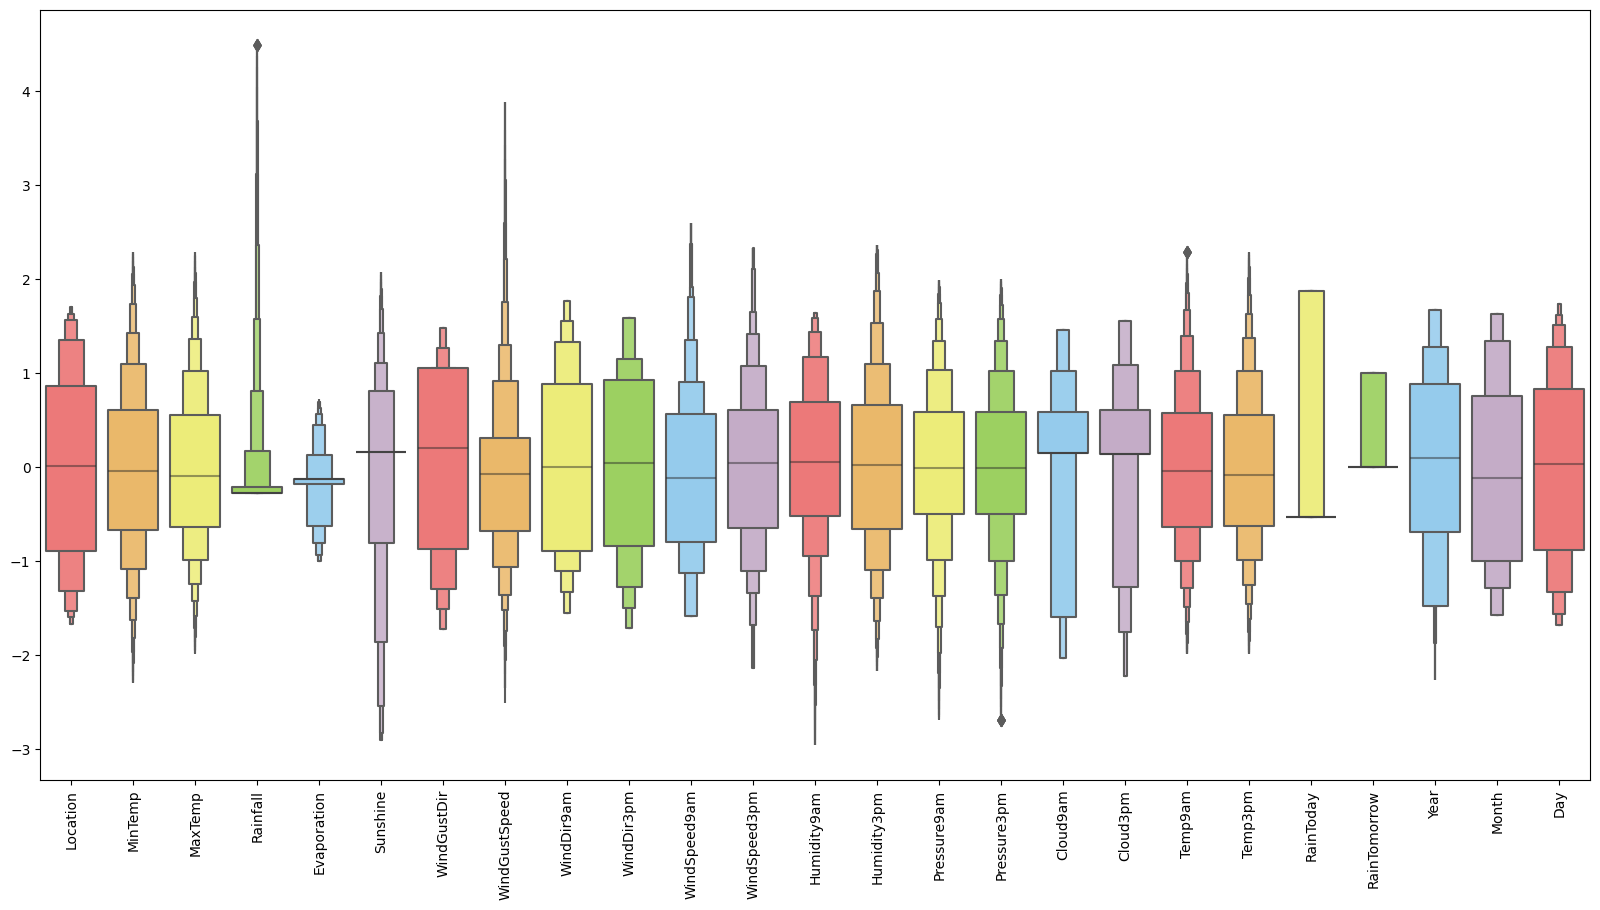

In [34]:
#looking at the scaled features without outliers

colors = ["#ff6666", "#ffbd55", "#ffff66", "#9de24f", "#87cefa", '#C8A8CB']
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colors)
plt.xticks(rotation=90)
plt.show()

Looks good. Now we can split the data in training and testing sets.

### Splitting the Dataset <a class="anchor" id="6.3"></a>

In [35]:

X = df.drop(['RainTomorrow'], axis=1)
y = df["RainTomorrow"]

# Splitting the test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 7. Feature Analysis (Multivariate Analysis)<a class="anchor" id="7"></a>
To see what features are most relevant to predicting whether it will rain tomorrow, we can use a heatmap to visualize the correlation matrix between the features and target variable.

### Heatmap <a class="anchor" id="7.1"></a>

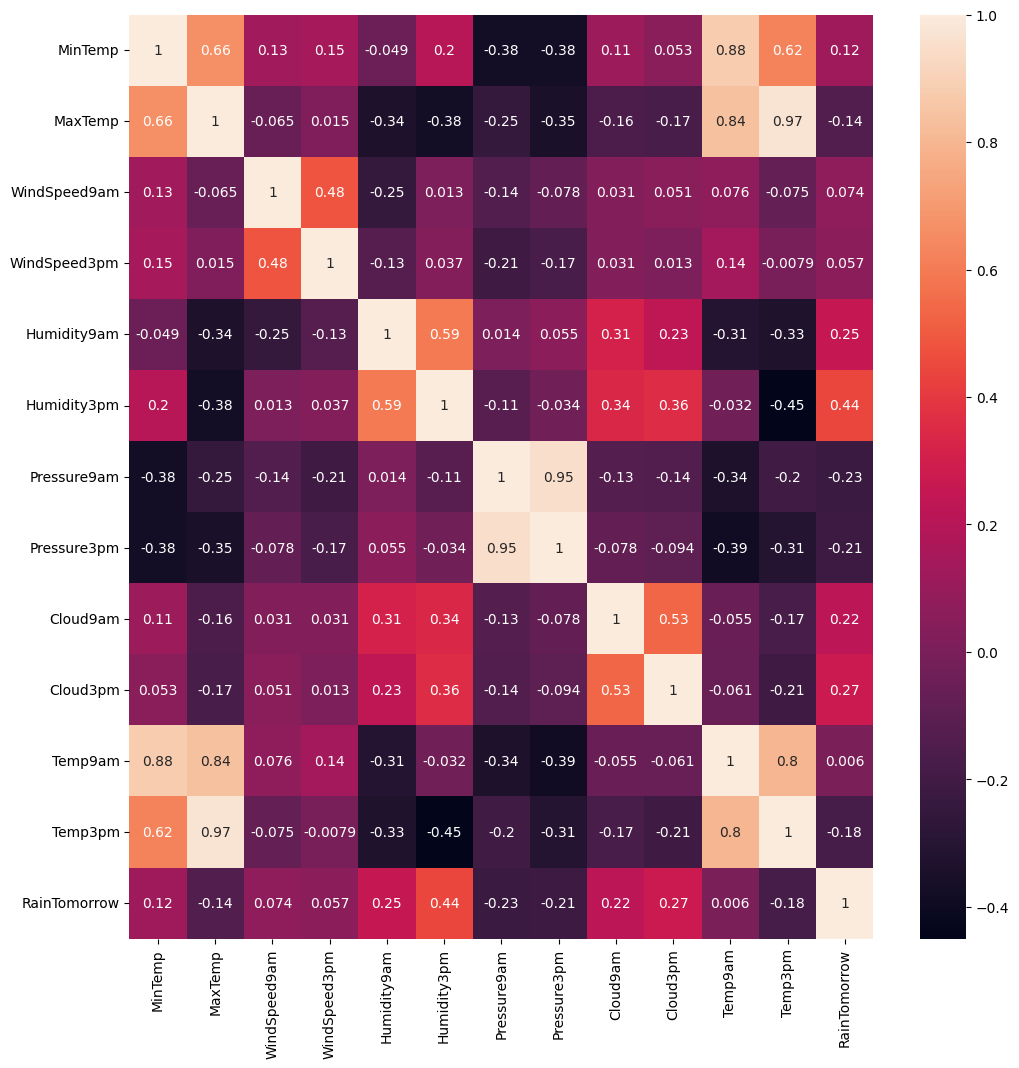

In [36]:
train=pd.concat([X_train,y_train],axis=1,join="inner")
test=pd.concat([X_test,y_test],axis=1,join="inner")
col=['MinTemp', 'MaxTemp', 'WindSpeed9am','WindSpeed3pm', 
     'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
     'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm','RainTomorrow']

plt.figure(figsize=(12,12))
ax= sns.heatmap(train[col].corr(),annot=True);
plt.show()

#### Heapmap Interpretation <a class="anchor" id="7.1.1"></a>


From the above correlation heat map, we can conclude that :-
- The variables related to temperature, pressure, and clouds are strongly correlated with one another.
- The variables that seem most correlated with the target are `MaxTemp`, `Temp3pm`, and `Humidity 3pm` as their absolute value is higher.

### Feature Engineering and Selection <a class="anchor" id="7.2"></a>
Let's see if the differences between related variables are more correlated with the target:

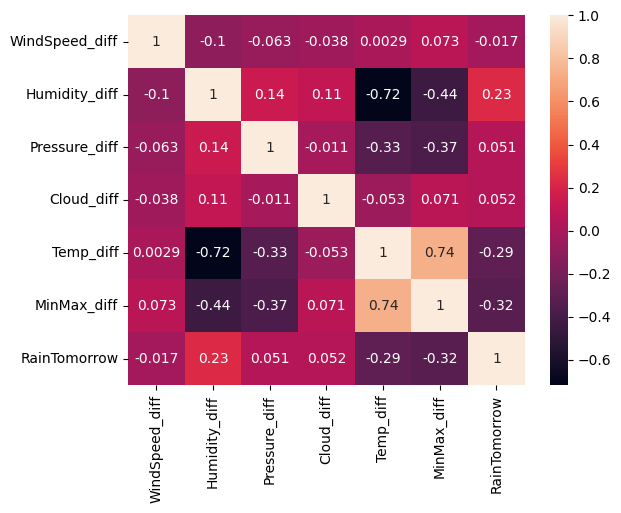

In [37]:
train["WindSpeed_diff"]=train["WindSpeed3pm"]-train["WindSpeed9am"]
train["Humidity_diff"]=train["Humidity3pm"]-train["Humidity9am"]
train["Pressure_diff"]=train["Pressure3pm"]-train["Pressure9am"]
train["Cloud_diff"]=train["Cloud3pm"]-train["Cloud9am"]
train["Temp_diff"]=train["Temp3pm"]-train["Temp9am"]
train["MinMax_diff"]=train["MaxTemp"]-train["MinTemp"]

test["WindSpeed_diff"]=test["WindSpeed3pm"]-test["WindSpeed9am"]
test["Humidity_diff"]=test["Humidity3pm"]-test["Humidity9am"]
test["Pressure_diff"]=test["Pressure3pm"]-test["Pressure9am"]
test["Cloud_diff"]=test["Cloud3pm"]-test["Cloud9am"]
test["Temp_diff"]=test["Temp3pm"]-test["Temp9am"]
test["MinMax_diff"]=test["MaxTemp"]-test["MinTemp"]

n_col=["WindSpeed_diff","Humidity_diff","Pressure_diff","Cloud_diff","Temp_diff",
       "MinMax_diff",'RainTomorrow']
sns.heatmap(train[n_col].corr(),annot=True);

In [38]:
drop_col=["WindSpeed_diff","Humidity_diff","Pressure_diff","Cloud_diff",
          "MinTemp", "MaxTemp","Temp9am", "Temp3pm","RainTomorrow"]

X_train=train.drop(drop_col,axis=1)
y_train=train["RainTomorrow"]

X_test=test.drop(drop_col,axis=1)
y_test=test["RainTomorrow"]

#### Feature Engineering and Selection Interpretation <a class="anchor" id="7.1.1"></a>


From the above correlation heat map, we can see that the Temp_diff and MinMax_diff are more strongly correlated with the target (|-0.021| > |-0.016| and |-0.017|), so we can use these features instead. 

Feature selection is important in the context of neural networks because we do not want to select features that would just provide noise to the model, and make the model overfit data. We want to remove redundant features so that the model only uses features that genreralize well to new data. Also, using less features can be computationally efficient as neural networks with a large number of features can take more resources to train. 

## Model Building <a class="anchor" id="8"></a>
    
Now let us build a neural network model using tensorflow. This is a sequential multilayer fully connected neural network with some parameters explained in the comment below.

In [39]:
model=Sequential()
# units specifies the number of neurons in each hidden layer of the neural network. In our case we have 5 hidden layers with varied number of neurons. 
# activation is the activation function used for hidden layers. In our case we are using rectified linear units which is pretty common.
model=Sequential()
model.add(Dense(units=20,input_dim=22,activation="relu"))
model.add(Dense(units=20,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=5,activation="relu"))
# Note that the last layer uses the sigmoid activation function instead, to give a binary output for the prediction
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                460       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                

## Model Training and Validation <a class="anchor" id="9"></a>
    
### First Model <a class="anchor" id="9.1"></a>
    
Let's train our model above on our training data, and see its accuracy using the validation set:

2459/2459 [==============================] - 6s 2ms/step - loss: 0.4860 - accuracy: 0.7798
Epoch 1/50
1230/1230 [==============================] - 3s 3ms/step - loss: 0.4067 - accuracy: 0.8192 - val_loss: 0.4015 - val_accuracy: 0.8267
Epoch 2/50
1230/1230 [==============================] - 3s 2ms/step - loss: 0.3977 - accuracy: 0.8235 - val_loss: 0.3931 - val_accuracy: 0.8288
Epoch 3/50
1230/1230 [==============================] - 3s 3ms/step - loss: 0.3912 - accuracy: 0.8284 - val_loss: 0.3874 - val_accuracy: 0.8305
Epoch 4/50
1230/1230 [==============================] - 3s 3ms/step - loss: 0.3860 - accuracy: 0.8315 - val_loss: 0.3837 - val_accuracy: 0.8332
Epoch 5/50
1230/1230 [==============================] - 3s 3ms/step - loss: 0.3823 - accuracy: 0.8336 - val_loss: 0.3811 - val_accuracy: 0.8356
Epoch 6/50
1230/1230 [==============================] - 3s 3ms/step - loss: 0.3798 - accuracy: 0.8360 - val_loss: 0.3793 - val_accuracy: 0.8352
Epoch 7/50
1230/1230 [=======================

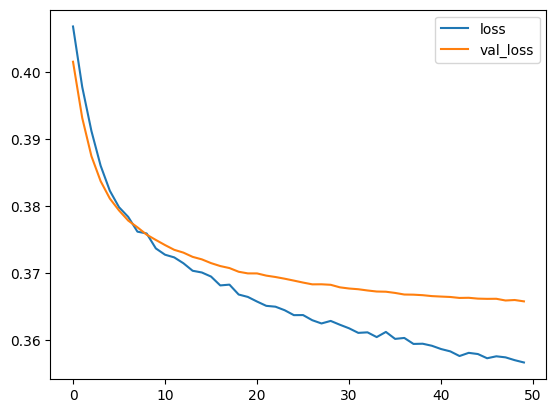

In [40]:
# stop early based on loss function
earlystopping=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,restore_best_weights=True)

# solver is the optimization alogirthm used to update weights in the network. 'adam' is an adaptive learning rate well suited for large datasets like ours.
# learning_rate controls the step size during optimization. In our case it is kept constant.
opt = Adam(learning_rate=0.0001)

# compile model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train)
# the epochs is the maximum number of iterations (epochs) for which the solver should converge.
history = model.fit(X_train,y_train,batch_size=64,epochs=50,
                      callbacks=[earlystopping],validation_data=(X_test,y_test))
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();

In [41]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')

615/615 [==============================] - 1s 1ms/step
Test Accuracy: 0.8414603142319622


Before I was using sklearn to create the neural network, but there doesn't seem to be an easy way to change the output layer's activation function to use sigmoid. Therefore, I was getting unwanted results. However, I did implement a grid search cross validation method for that model that seemed to work and chose the best hyperparameters. I think one could do the same for the above tensorflow model, but it would be very computationally expensive, considering it takes several minutes just to train the model above.

### Hyperparameter Tuning <a class="anchor" id="9.2"></a>

Regardless, let's try to make a hyperparameter tuner for the tensorflow model using cross validation (kfold):

In [42]:
# defining our model builder
def model_builder(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 5-30
    hp_units = hp.Int('units', min_value=5, max_value=30, step=5)
    
    model.add(Dense(units=hp_units,input_dim=22,activation="relu"))
    model.add(keras.layers.Dense(10))
    # Note that the last layer uses the sigmoid activation function instead, to give a binary output for the prediction
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="binary_crossentropy",
                metrics=['accuracy'])

    return model

In [43]:
hp_tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                    max_consecutive_failed_trials = 3)

brakes = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [44]:
hp_tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[brakes])

# Get the best hyperparamters for the hypermodel
best_hps=hp_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is: 
{best_hps.get('units')} 
and the optimal learning rate for the optimizer is: 
{best_hps.get('learning_rate')}.
""")

Trial 18 Complete [00h 00m 11s]
val_accuracy: 0.8302402496337891

Best val_accuracy So Far: 0.8454302549362183
Total elapsed time: 00h 03m 09s

The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is: 
30 
and the optimal learning rate for the optimizer is: 
0.001.



In [45]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = hp_tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

# reinstantiate hypermodel and train it
hypermodel = hp_tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/50
1967/1967 [==============================] - 5s 2ms/step - loss: 0.3796 - accuracy: 0.8389 - val_loss: 0.3665 - val_accuracy: 0.8433
Epoch 2/50
1967/1967 [==============================] - 5s 2ms/step - loss: 0.3598 - accuracy: 0.8443 - val_loss: 0.3619 - val_accuracy: 0.8445
Epoch 3/50
1967/1967 [==============================] - 4s 2ms/step - loss: 0.3565 - accuracy: 0.8466 - val_loss: 0.3587 - val_accuracy: 0.8465
Epoch 4/50
1967/1967 [==============================] - 5s 3ms/step - loss: 0.3540 - accuracy: 0.8474 - val_loss: 0.3578 - val_accuracy: 0.8459
Epoch 5/50
1967/1967 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.8479 - val_loss: 0.3573 - val_accuracy: 0.8458
Epoch 6/50
1967/1967 [==============================] - 4s 2ms/step - loss: 0.3518 - accuracy: 0.8486 - val_loss: 0.3557 - val_accuracy: 0.8456
Epoch 7/50
1967/1967 [==============================] - 5s 2ms/step - loss: 0.3508 - accuracy: 0.8493 - val_loss: 0.3568 - val_accuracy:

In [56]:
# updating predictions
y_pred = hypermodel.predict(X_test)
y_pred = (y_pred > 0.5)

615/615 [==============================] - 1s 1ms/step


It's important to tune the hyperparameters of the neural network because we can get a better performance, with respect to both accuracy and speed, with different hidden layer sizes, activation functions, optimization algorithms, batch sizes, etc. This is because we can help the model generalize to unseen data and avoid overfitting or underfitting.

## Hypermodel Evaluation <a class="anchor" id="10"></a>
    
Looks like our initial model accuracy was around $84\%$ and the best accuracy from hyperparameter tuning was around $85\%$. Let's take a look at the confusion matrix:

<Axes: >

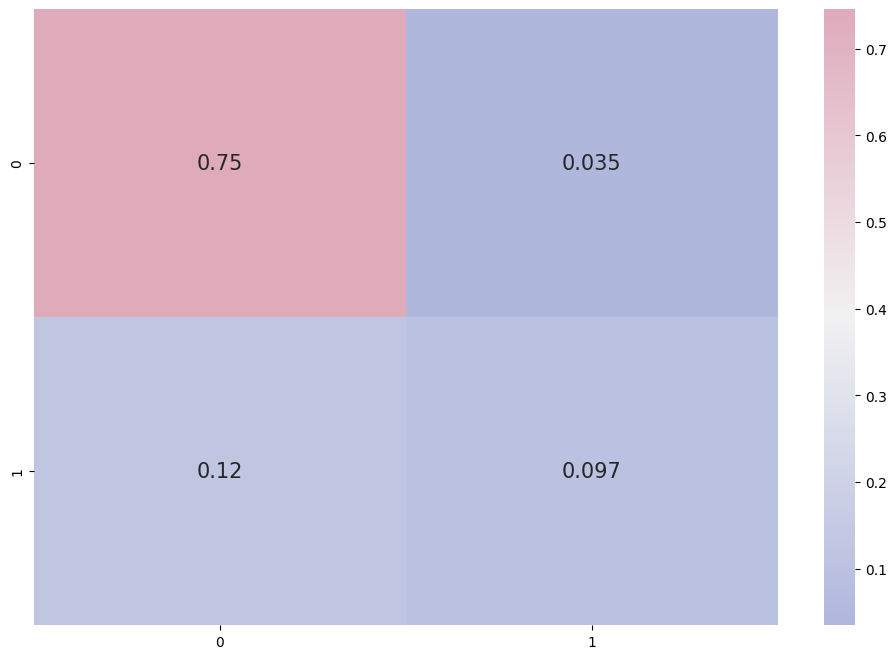

In [57]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

Taking a look at recall, f1-score, accuracy, and related metrics:

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     15343
           1       0.74      0.44      0.55      4324

    accuracy                           0.84     19667
   macro avg       0.80      0.70      0.73     19667
weighted avg       0.83      0.84      0.83     19667



## Report and Interpretation <a class="anchor" id="11"></a>

To summarize, we used tensorflow to create a multilayer fully connected neural network model that predicted whether it would rain tomorrow in Australia after processing the dataset as needed. 

From above, we generally did well for predicting that it was not going to rain. That is, we had $74\%$ true negatives, $4\%$ false positives, $12\%$ false negatives, and $10\%$ true positives. We could have had a better rate for predicting if it would rain because we got it correct $55\%$ of the time. However, getting the prediction for no rain right $90\%$ of the time is not bad. So overall, we had good results.
    
Some challenges I faced was trying to use sklearn for building the model. It was difficult because it restrictive in how specific I could make the model to my needs. It lacked customizability compared to the tensorflow model, because I could change each layer individually (i.e. to include the hidden layer with the sigmoid activation function). Also, I ran into issues with my data processing when trying to process the data and then do the data split. In the future, I may want to try different orders of processing the data. 
    
Also, the model could be improved by a better quality of feature analysis and engineering. I'm sure one could parse the Date differently, or use different features altogether to attempt to improve model accuracy. Also different hyperparameters, such as batch size or the type of solver, could be adjusted to find the best possible hyperparameters for a model. 